In [ ]:
import numpy as np
import pandas as pd 
import glob
from matplotlib import pyplot as plt
from tqdm import tqdm
import cv2 as cv
from cgan.cgan import *
import tensorflow as tf
import tensorflow.keras as keras

## Cargamos los datos de entrenamiento

Distribución de los datos:

- Angry - 3995
- Disgust - 436
- Fear - 4097
- Happy - 7215
- Neutral - 4965
- Sad - 4830
- Surprise - 3171

Podemos notar que tenemos muy pocas imágenes de disgusto

In [19]:
def load_images(images):
    """
    Carga las imagenes y las convierte en un dataframe, 
    cada imagen con su etiqueta de sentimiento correspondiente
    """
    types = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,'neutral': 4, 'sad': 5, 'surprise': 6}
    data = {'label': [], 'img': [], 'type': []} 

    for image in tqdm(images):
        name = image.split('/')[2]
        data['label'].append(name)
        data['type'].append(types[name])
        img = cv.imread(image,cv.IMREAD_GRAYSCALE)
        img = img.astype(np.float32) / 255 # Normalizamos los valores rgb
        data['img'].append(img)
    return pd.DataFrame(data)

In [20]:
url = glob.glob('data/train/**/*')
images = load_images(url)

100%|██████████| 28709/28709 [00:04<00:00, 6800.25it/s]


In [21]:
def display_img(i, imgs):
    """Despliega 25 imagenes apartir de i"""
    plt.figure(1, figsize=(5,5))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(imgs.iloc[i]['img'], cmap='gray')
        plt.axis('off')
    plt.show()

def display_emotion(name):
    """Toma las caras con cierta emoción y muestra 25"""
    emotion = images[images['label'] == name]
    print(f'{name}: ',len(emotion))
    display_img(1, emotion)

fear:  4097


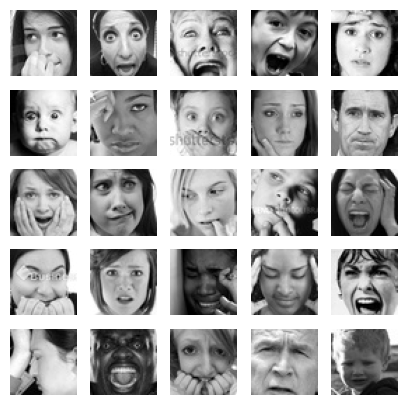

In [22]:
display_emotion('fear')

angry:  3995


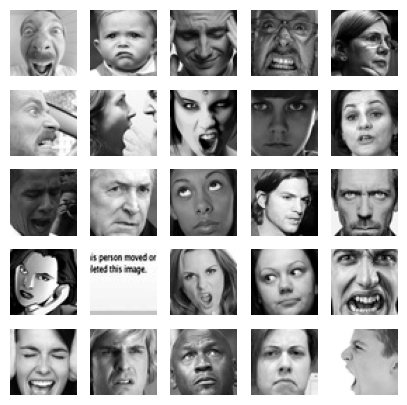

In [24]:
display_emotion('angry')

disgust:  436


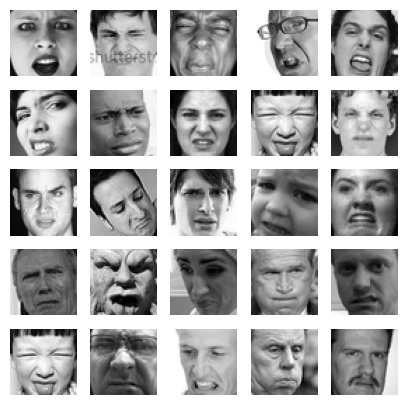

In [44]:
display_emotion('disgust')

happy:  7215


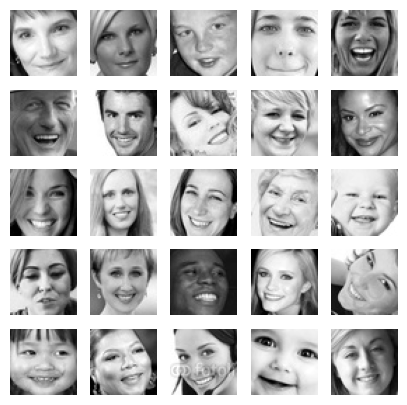

In [45]:
display_emotion('happy')

neutral:  4965


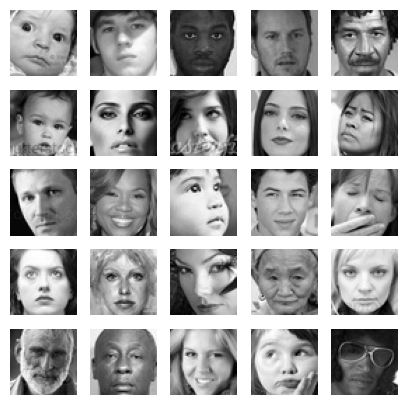

In [46]:
display_emotion('neutral')

sad:  4830


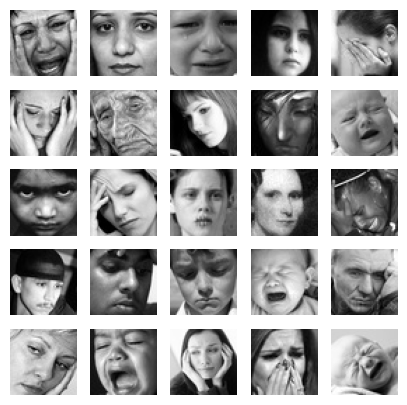

In [47]:
display_emotion('sad')

surprise:  3171


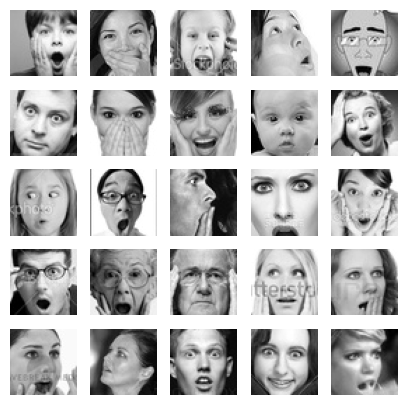

In [48]:
display_emotion('surprise')

In [37]:
data = [np.array(images['img'].values.tolist(), dtype=np.uint8),
        np.array(images['type'].values.tolist(), dtype=np.float32)]

In [55]:
gan = GAN(data)
gan.train_gan(n_epochs=30, n_batch=128)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                       

AttributeError: 'GAN' object has no attribute 'train_gan'